# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

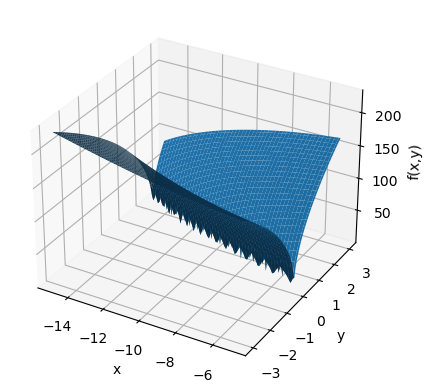

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def bukin(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * (x ** 2))) + 0.01 * np.abs(x + 10)

# define the range of x and y values
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)

# create a grid of x and y values to plot
X, Y = np.meshgrid(x, y)

# compute the value of the Bukin function N6 at each (x, y) point on the grid
Z = bukin(X, Y)

# create a new figure
fig = plt.figure()

# add a 3D subplot to the figure
ax = fig.add_subplot(111, projection = '3d')

# labels for x, y and f(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# plot the Bukin function N6 as a surface
ax.plot_surface(X, Y, Z)

plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [80]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# "start" = a tuple representing the starting point for the algorithm
# "step_size" = a float representing the maximum distance that the algorithm can move in each iteration
# "max_iter" = an integer representing the maximum number of iterations for the algorithm

def hill_climbing(start, step_size, max_iter):
    
    # define the initial state and value
    current_state = start
    current_value = bukin(*current_state)

    # function to generate a neighbouring state by perturbing the current state
    def neighbour(state):
        x, y = state
        x2 = x + random.uniform(-step_size, step_size)
        y2 = y + random.uniform(-step_size, step_size)
        return x2, y2

    # define the stop criteria
    iter_count = 0
    
    while iter_count < max_iter:
        iter_count += 1
        
        # generate a new state
        new_state = neighbour(current_state)
        
        # compute the new value
        new_value = bukin(*new_state)
        
        # update the current state and value if the new value is lower than the current value
        if new_value < current_value:
            current_state = new_state
            current_value = new_value
        # if the new value is greater than the current one, exit the loop
        else:
            break

    return current_state, current_value


# define the arguments of the function hill climbing
start = (-10, 1)
step_size = 0.1
max_iter = 5000

# call the function and store its result in a variable
result = hill_climbing(start, step_size, max_iter)

# print the minimum value found and its location
print("Minimum value found:", result[1])
print("Location of minimum:", result[0])

Minimum value found: 0.0
Location of minimum: (-10, 1)


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [90]:
import random


def knapsack(weights, values, max_weight):
    
    # determine the number of items to be considered
    n = len(weights)
    
    # combine the weights and values of all the items in a list of tuples
    items = [(weights[i], values[i]) for i in range(n)]
    
    # sort the items by their value-weight ratio in descending order
    items.sort(key=lambda x: x[1]/x[0], reverse=True)
    
    # initialize with 0 the total weight and value
    total_weight = 0
    total_value = 0
    
    # iterate over the sorted items and add them to the knapsack
    for i in range(n):
        # if adding the current element to the knapsack does not exceed the max weight, add it
        if total_weight + items[i][0] <= max_weight:
            total_weight += items[i][0]
            total_value += items[i][1]
        # exit the loop if the max weight was reached
        else:
            break
    return total_value



def hill_climbing(weights, values, max_weight, max_iter):
    # define the initial state and value
    n = len(weights)
    current_state = [0] * n
    current_value = knapsack(weights, values, max_weight)

    # define the neighbour function
    def neighbour(state):
        
        # make a copy of the current state
        new_state = state.copy()
        
        # choose a random number to flip the corresponding bit
        i = random.randint(0, n - 1)    
        new_state[i] = 1 - new_state[i]
        return new_state

    
    # define the stop criteria
    iter_count = 0
    while iter_count < max_iter:
        iter_count += 1
        
        # get a new neighbour state
        new_state = neighbour(current_state)
        
        # compute the value of the new state
        new_value = knapsack(weights, values, max_weight)
        
        if new_value > current_value:
            # update the current state
            current_state = new_state
            # update the current value
            current_value = new_value
        # stop iterating if the new state is not an improvement
        else:
            break 

    return current_state, current_value


weights = [100, 20, 38, 24, 50]
values = [4, 10, 2, 8, 25]
max_weight = 100
max_iter = 1000

result = hill_climbing(weights, values, max_weight, max_iter)
print("Best state:", result[0])
print("Best value:", result[1])

Best state: [0, 0, 0, 0, 0]
Best value: 43



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  